In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'1.6.0-dev20180114'

In [3]:
from tensorflow.python import keras

In [4]:
from tensorflow.python.keras.models import Sequential

In [5]:
import numpy as np
import pandas
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [6]:
df_train = pd.read_csv('./data/asilomar_nov182017_all.csv')
X = df_train[['u','v','w','h']]
y = df_train['distance']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30)

In [8]:
print len(X_train),len(X_val),len(y_train), len(y_val)

11088 4753 11088 4753


In [9]:
NUM_FEATURES = len(X.columns)

In [39]:
def dist_regression_model():
    model = Sequential()
    model.add(Dense(NUM_FEATURES, input_dim=NUM_FEATURES, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
def dist_regression_model_jerry():
    model = Sequential()
    model.add(Dense(NUM_FEATURES*4, input_dim=NUM_FEATURES, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [40]:
# model = dist_regression_model()
model = dist_regression_model_jerry()

In [14]:
from tensorflow.python.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

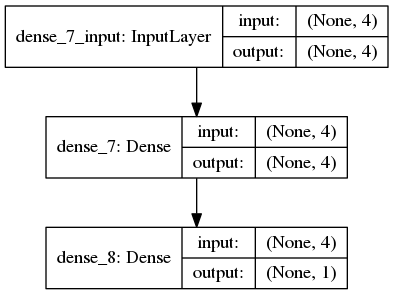

In [15]:
from IPython.display import Image
Image('model.png')

In [41]:
model.input

<tf.Tensor 'dense_11_input:0' shape=(?, 4) dtype=float32>

In [27]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=model, nb_epoch=100, batch_size=5, verbose=0)

In [48]:
X_train.shape
y_train.shape

(11088,)

In [53]:
x = X_train.loc[0,:].values
model.fit(X=x,y=y_train.values)

ValueError: Input arrays should have the same number of samples as target arrays. Found 0 input samples and 11088 target samples.

In [55]:
!pip install keras

  Using cached Keras-2.1.2-py2.py3-none-any.whl
